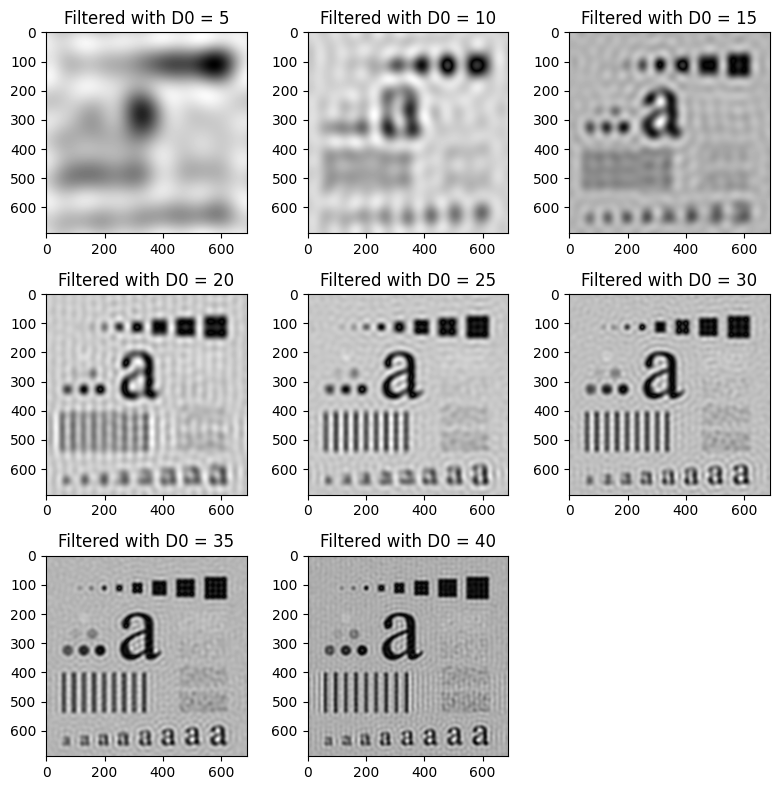

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def add_gaussian_noise(image, mean=0, stddev=0.5):
    gaussian_noise = np.random.normal(mean, stddev, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)


def ideal_low_pass_filter(image, cut_off_frequency):
    D0 = cut_off_frequency
    height, width = image.shape
    H = np.zeros(image.shape)

    frequency_domain_image = np.fft.fftshift(np.fft.fft2(image))

    for i in range(height):
        for j in range(width):
            D = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            H[i, j] = D <= D0

    fitered_image = frequency_domain_image * H
    filtered_image = np.abs(np.fft.ifft2(fitered_image))
    filtered_image = filtered_image / 255
    return filtered_image


original_image = plt.imread('ck.tif')
noisy_image = add_gaussian_noise(original_image, 0, 50)

plt.figure(figsize=(8, 8))
number_of_filter = 8
cut_off_frequency = 5
dim = int(np.ceil(np.sqrt(number_of_filter)))

for i in range(number_of_filter):
    filtered_image = ideal_low_pass_filter(noisy_image, cut_off_frequency)
    plt.subplot(dim, dim, i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered with D0 = {cut_off_frequency}')
    cut_off_frequency = cut_off_frequency + 5

plt.tight_layout()
plt.show()
